In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

from PIL import Image
from scipy import ndimage
import numpy as np
import skimage.io as io
import tensorflow as tf
import matplotlib.pyplot as plt
import pascal3d
import cv2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import pascal3d

# def flip_vc_points_2d(vc_points):
#     vc_points[:, 0] = 224- vc_points[:, 0] 

#     return vc_points

In [24]:


reconstructed_records = []
record_iterator = tf.python_io.tf_record_iterator(path="/notebooks/selerio/imagenet_train.tfrecords")

# next(record_iterator)
# next(record_iterator)
# next(record_iterator)
a_record = next(record_iterator)
# a_record = next(record_iterator)

# for string_record in record_iterator:
    
example = tf.train.Example()
example.ParseFromString(a_record)    

output_vector = example.features.feature['output_vector'].float_list.value

img_string = (example.features.feature['object_image']
                              .bytes_list
                              .value[0])


img_1d = np.fromstring(img_string, dtype=np.uint8)
reconstructed_img = img_1d.reshape((224, 224, -1))

reconstructed_records.append((reconstructed_img, output_vector))
print("Done")

Done


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


<IPython.core.display.Javascript object>


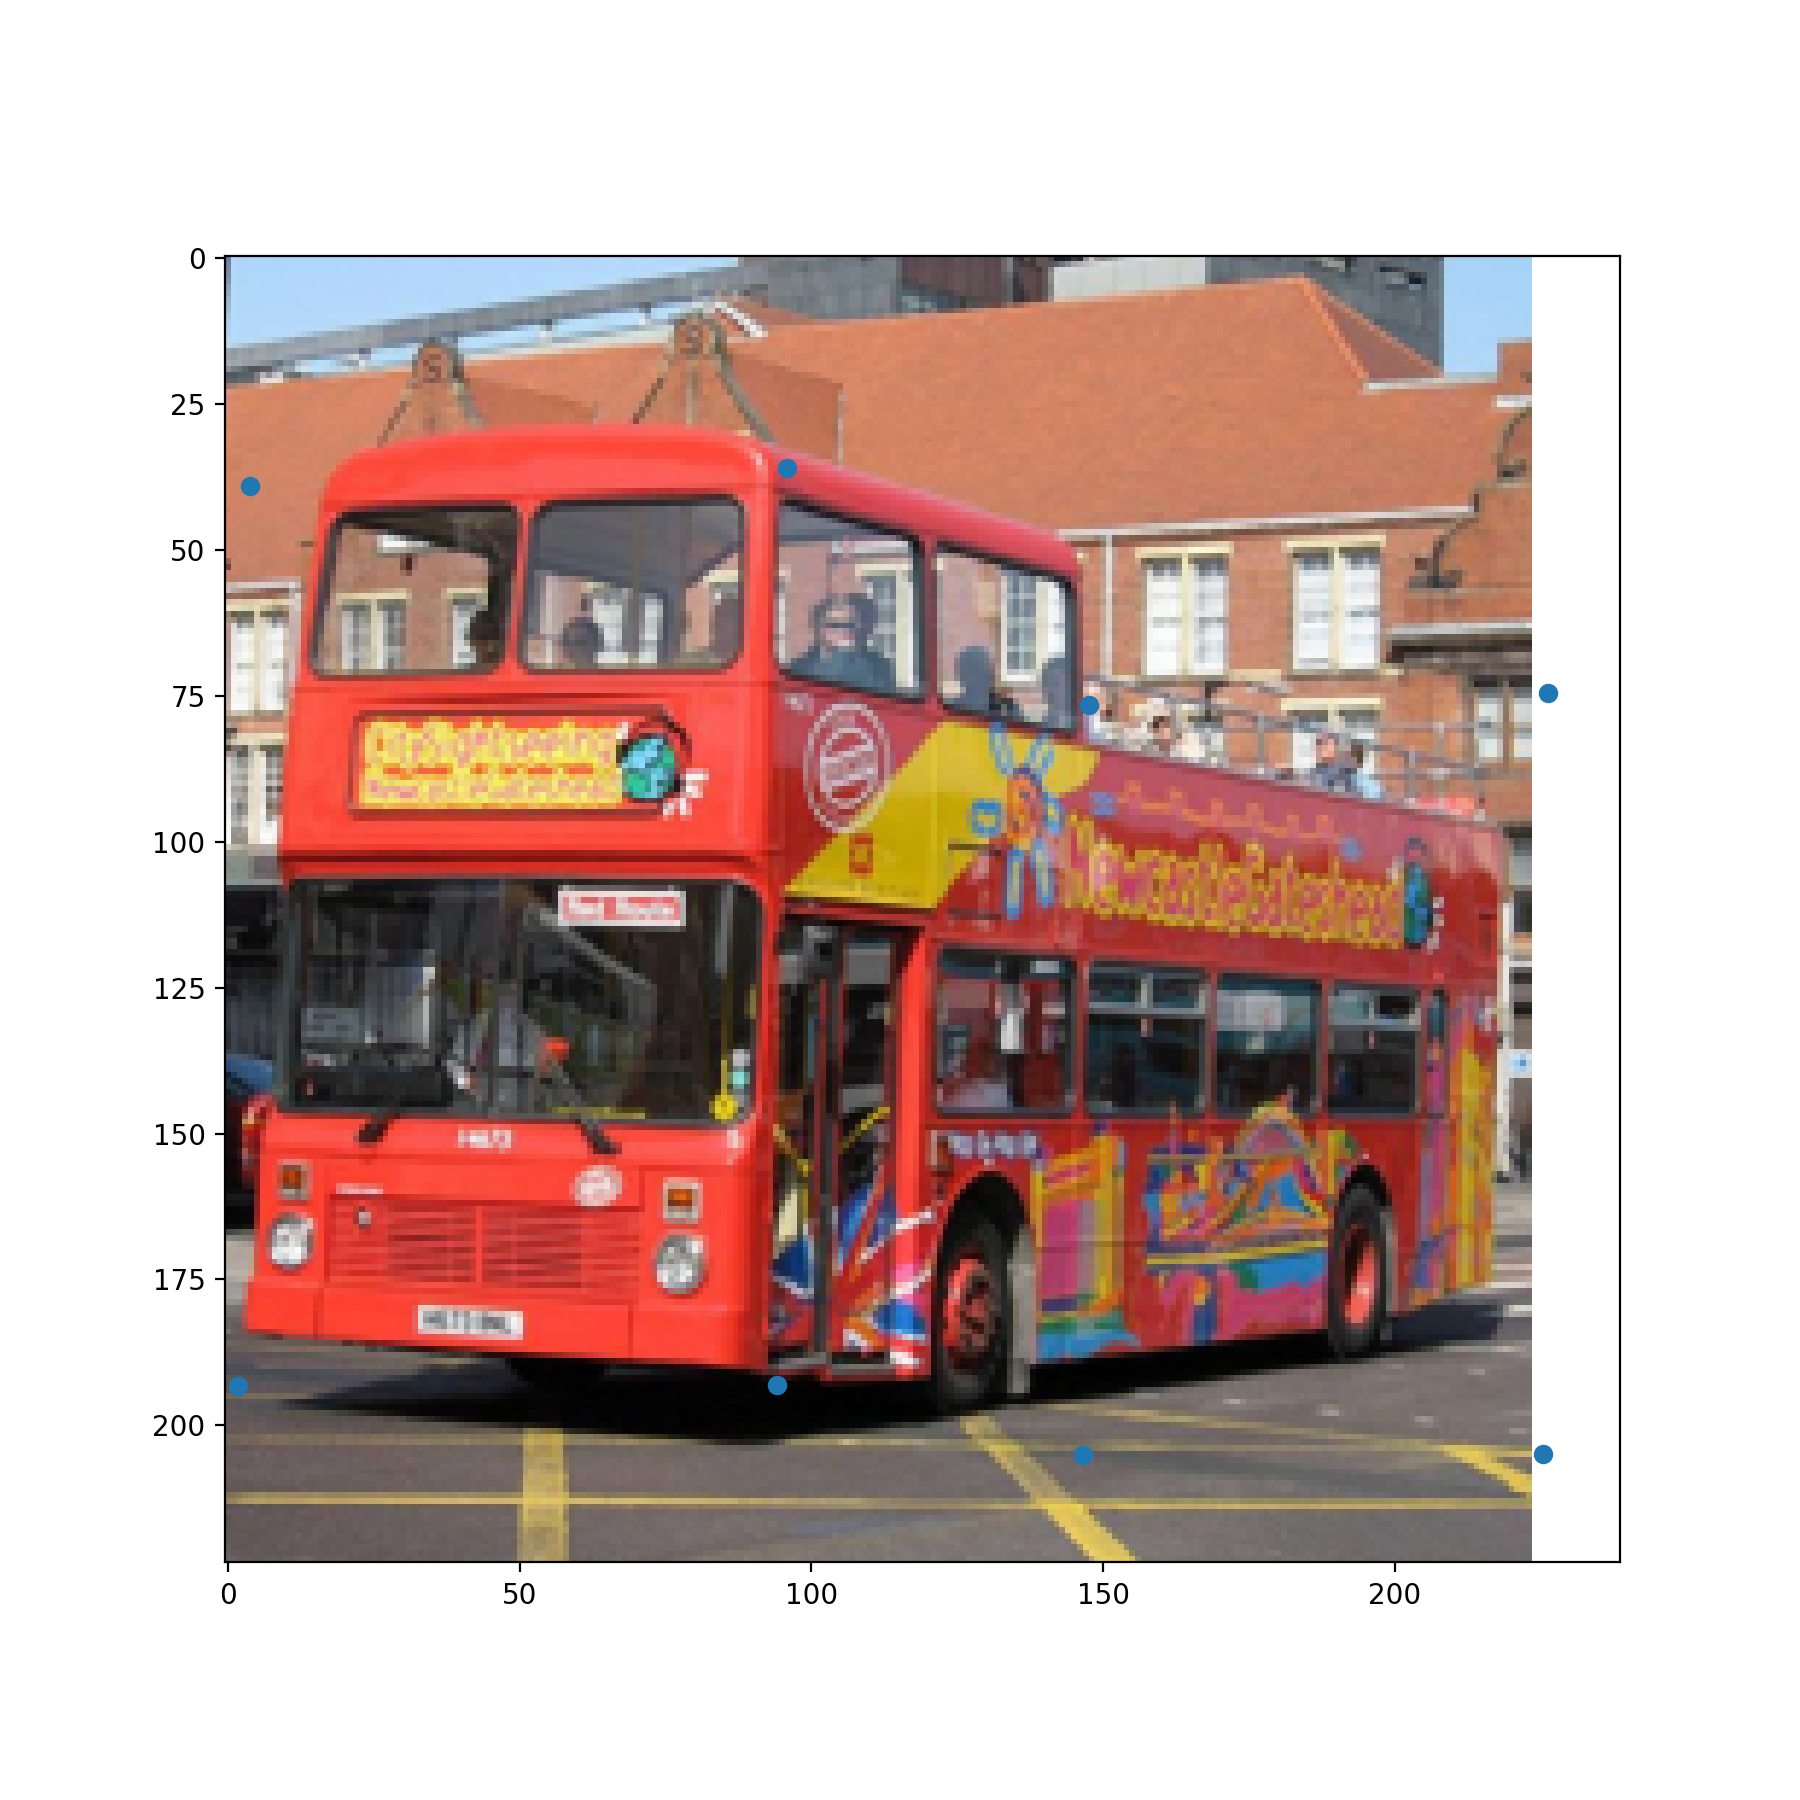

Original VC Points
[[  1.7420004  193.30113983]
 [  3.85287315  39.06183863]
 [146.51115036 205.03546715]
 [147.62781143  76.50329304]
 [ 94.17573357 193.00655365]
 [ 95.82533741  35.85540009]
 [225.4756813  204.97595978]
 [226.25436401  74.42802525]]


In [25]:

        
for counter, (image, output_vector) in enumerate(reconstructed_records):
    if counter == 1:
        break
    
    virtual_control_points = np.array(output_vector[:16]).reshape(8,2) * 224
    
    fig = plt.figure(figsize=(9,9))
    ax = plt.subplot(1, 1, 1)
#     ax2 = plt.subplot(1,3,2)
#     ax3= plt.subplot(1,3,3)
    
#     sigma = 1
#     std = sigma ** 0.5
#     blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

#     x_offset, y_offset = (np.random.rand(2) * 20)
#     vc_points_jittered = np.zeros((8,2))
#     vc_points_jittered[:, 0] = virtual_control_points[:, 0] + int(round(x_offset))
#     vc_points_jittered[:, 1] = virtual_control_points[:, 1] + int(round(y_offset))
#     print("VC Points Jittered")
#     print(vc_points_jittered)
    
    ax.imshow(image)
#     ax2.imshow(np.fliplr(image))
    
#     new_img = cv2.copyMakeBorder(image, int(round(x_offset)), 0, int(round(y_offset)), 0, cv2.BORDER_CONSTANT, value=[255,255,255])
#     ax3.imshow(new_img)
    
    ax.scatter(virtual_control_points[:, 0], virtual_control_points[:, 1])
    print("Original VC Points")
    print(virtual_control_points)
    
#     print("Flipped VC Points")
#     flipped_vc_points = flip_vc_points(virtual_control_points)
#     print(flipped_vc_points)
#     ax2.scatter(flipped_vc_points[:, 0], flipped_vc_points[:, 1])
    
#     ax3.scatter(vc_points_jittered[:, 0], vc_points_jittered[:, 1])
    plt.show()
    

# scale the normalized 2d control points
#Plot the points

In [21]:
data_type = 'all'
dataset = pascal3d.dataset.Pascal3DDataset(data_type, generate=False)

<IPython.core.display.Javascript object>


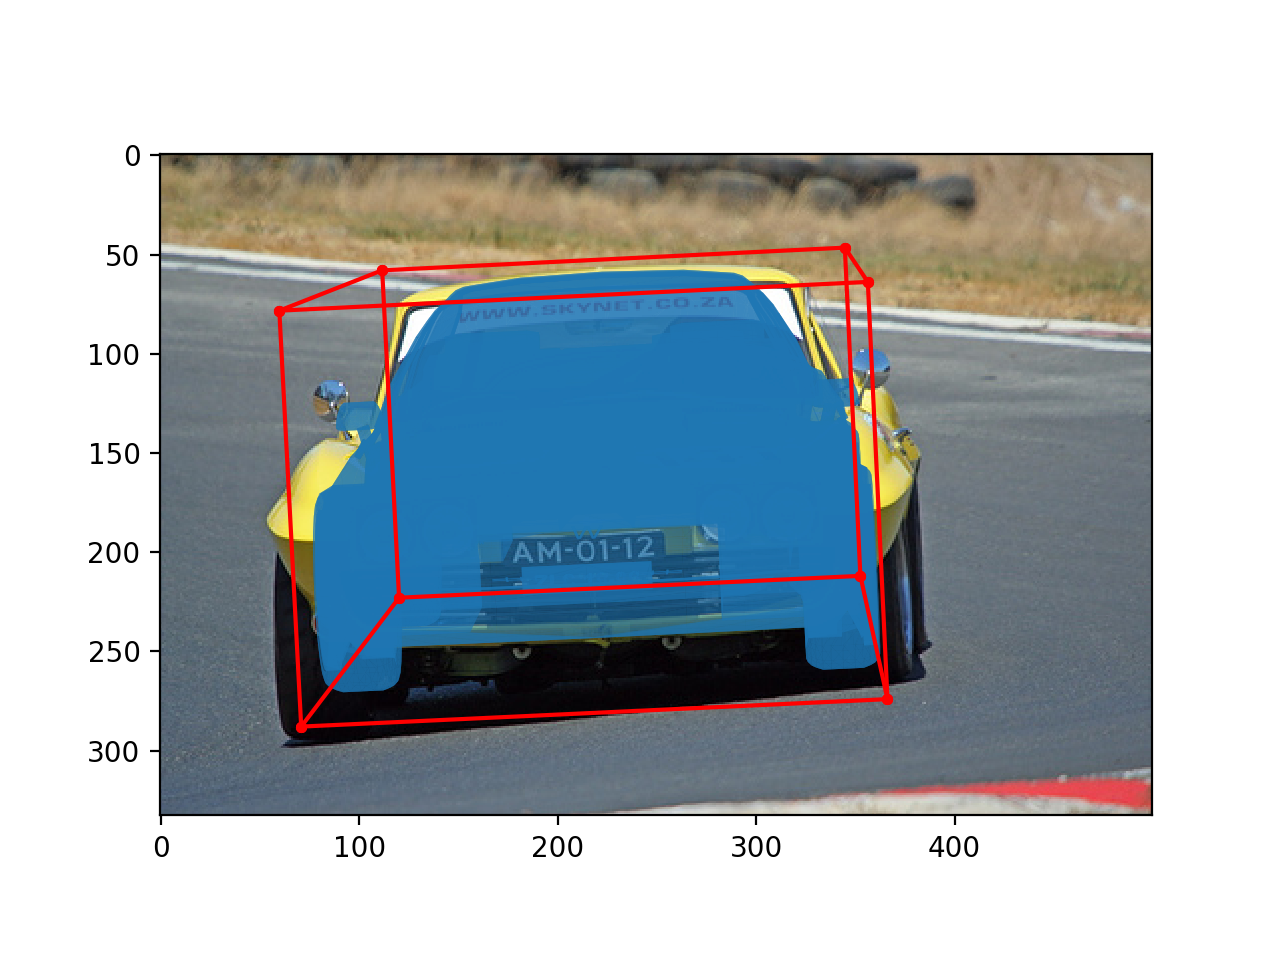

In [24]:
for data_id in  ['2008_000189']:
    dataset.show_virtual_control_points(0, data_id)